### Machine Learning - Andrew Ng Coursera
#### Programming Exercise 1: Linear Regression
ex1 Homework using Python. Attempted to recreated graphs as close as possible to the ones from the assignment sheet

I assume it is not a problem to post this since to get credit on the assignment it needs to be completed in Octave/MATLAB. Please contact me if there is an issue.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 2. Linear Regression with 1 Variable

Load the data and place it into the standard matricies for linear regression

In [2]:
def load_data(file_path):
    '''
        Returns a matrix X of features and a vector y of training values
        X : Matrix of training features
        y : Vector of training outputs
        m : number of training examples
        Data file assumed to be of the form: x1,x2,x3,...,xn,y1
        Where each row is one training example
    '''
    data = np.loadtxt(file_path, delimiter=',')
    X = data[:,:-1]
    y = data[:,-1]
    m = y.size
    X = np.insert(X, 0, 1, axis=1) # insert a column of 1's for the x0 'feature'
    
    return (X , y, m)
    

In [3]:
# Set X and y to the typical matricies for features and prices
# Set m to the number of training examples
X , y, m = load_data('data/ex1data1.txt')

The data is for predicting profits of a food truck based on the population of a city.

X is a matrix of the city population and y is a vector of profits in that city.

Negitive profit means a loss of money.

### 2.1 Plotting the Data
Plot the data as a scatter plot to first better understand our distribution of data
It is also possible to plot this since there is only a single feature. 
More complex problems this becomes more difficult to visualize

Note: I tried to match the example from the assignment graphed using Octave/MATLAB

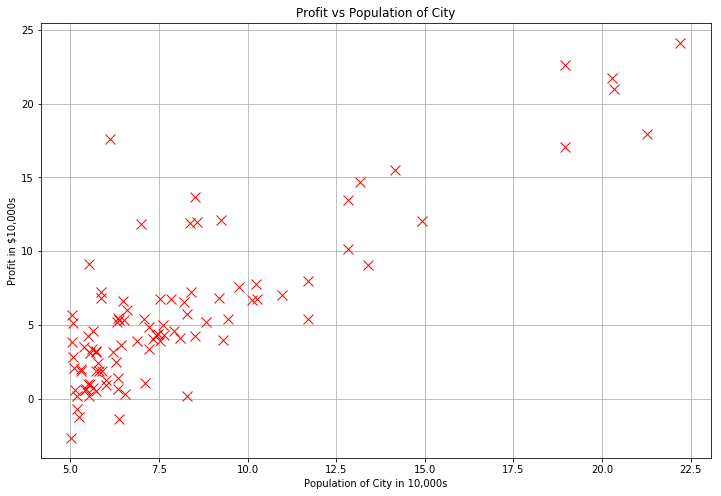

In [4]:
plt.figure(figsize=(12,8))
plt.plot(X[:,1], y[:], 'rx', markersize=10) # This is surprisingly similar to Octave
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs Population of City')
plt.grid(True)

### 2.2 Gradient Descent
Using gradient descent, fit theta parameters to the dataset

#### Define a function to calculate the cost function J

In [5]:
def compute_cost(X, y, m, theta):
    '''
        Returns
        J : Value of the cost function
        Note: There are several ways to implement this.
              I chose a general method so this will apply to multi feature sets too.
    '''
    J = (1/(2*m)) * (X.dot(theta) - y).T.dot(X.dot(theta) - y)
    # Note: np.T is the same as .Transpose()
    return J

#### Define a function to perform gradient descent

In [6]:
def gradient_descent(X, y, m, theta, alpha, iterations):
    '''
        Performs gradient descent and returns the updated theta values at the end of interations
        and the history of J incase we want to plot it to view convergence
    '''
    J_history = []
    for i in range(iterations):
        h = np.dot(X, theta)
        theta -= alpha/m * (X.T.dot(h-y))
        J_history.append(compute_cost(X, y, m, theta))
    
    J_history = np.array(J_history) # Make the history a numpy array
    return (theta, J_history)

##### Setup initial values and compute cost and compare to several values

In [7]:
alpha = 0.01
iterations = 1500
theta = [0 , 0]

In [8]:
theta_00 = [0 , 0]
theta_12 = [-1 , 2]
cost_00  = compute_cost(X, y, m, theta_00)
cost_12  = compute_cost(X, y, m, theta_12)

print('theta0 = 0, theta1 = 0\nExpected: 32.07\nCalculated: {}\n'.format(round(cost_00, 3)))
print('theta0 = -1, theta1 = 2\nExpected: 54.24\nCalculated: {}\n'.format(round(cost_12, 3)))

theta0 = 0, theta1 = 0
Expected: 32.07
Calculated: 32.073

theta0 = -1, theta1 = 2
Expected: 54.24
Calculated: 54.242



#### Perform Gradient Descent

In [9]:
 theta, J_hist = gradient_descent(X, y, m, theta, alpha, iterations)

In [10]:
print('Theta found from gradient descent: {}'.format(np.round(theta, 4)))
print('Expected theta: [-3.6303  1.1664]')

Theta found from gradient descent: [-3.6303  1.1664]
Expected theta: [-3.6303  1.1664]


### Plotting the Results


##### Visualize the Cost Function over iterations

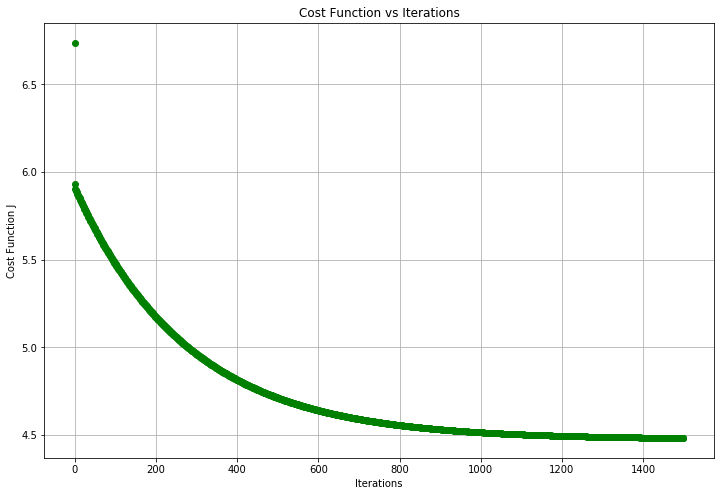

In [11]:
plt.figure(figsize=(12,8))
plt.plot(J_hist, 'go')
plt.xlabel('Iterations')
plt.ylabel('Cost Function J')
plt.title('Cost Function vs Iterations')
plt.grid(True)

In [12]:
def hypothesis(X, theta):
    '''
        Returns hypothesis values given x values
    '''
    return np.dot(X, theta)

##### Plot the training data with the model fit line

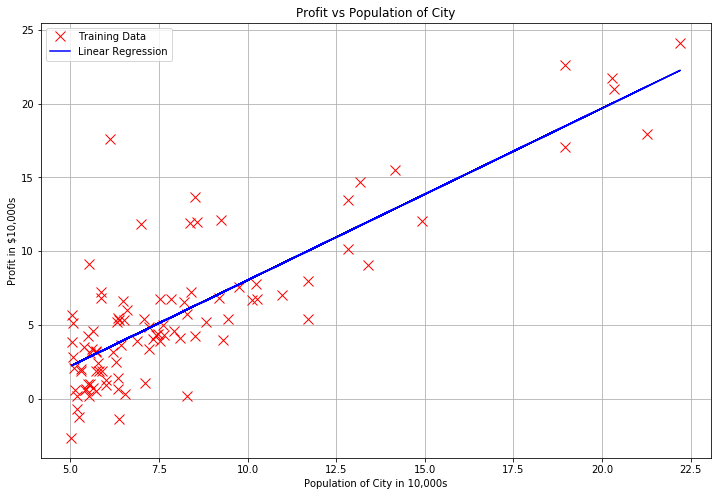

In [13]:
plt.figure(figsize=(12,8))
plt.plot(X[:,1], y[:], 'rx', label='Training Data', markersize=10)
plt.plot(X[:,1], hypothesis(X, theta), 'b-', label='Linear Regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs Population of City')
plt.legend()
plt.grid(True)

### 3. Linear Regression with Multiple Variables

In [14]:
# Load the training data for this section
X , y, m = load_data('data/ex1data2.txt')

This data is for predicting the price of a house in Portland, OR given the size of the house in square feet and number of bedrooms.
The data in X are 1, size, # bedrooms and y is a vector of prices

### 3.1 Feature Normalization
Since the features are in different data ranges (1000s of square feet vs several bedrooms) it makes sense to normalize our features.

Subtract the mean from each feature and divide by the standard deviation

In [15]:
def feature_normalize(matrix):
    '''
        Returns a matrix of normalized values, average value of each column mu, and standard deviation of each column sigma
        Subtract mean of each column from values then divide by the standard deviation of each column
    '''
    mu    = matrix.mean(axis=0) # average of each column
    sigma = matrix.std(axis=0)  # standard deviation of each column
    return ((matrix - mu) / sigma, mu, sigma)

In [16]:
# Normalize X and y
# Store the average and standard deviations to use later during predictions
X_norm, X_mu, X_sigma = feature_normalize(X[:,1:]) # Do not send x0 1s column to normalize
X_norm = np.insert(X_norm, 0, 1, axis=1) # Replace x0 1s column
y_norm, y_mu, y_sigma = feature_normalize(y)

### 3.2 Gradient Descent
This should be easy since the functions defined earlier were generalized to any number of features

In [17]:
# Set Initial values
alpha = 0.01
iterations = 400
theta = np.zeros(3)

In [18]:
# Run gradient Descent
theta_grad, J_hist = gradient_descent(X_norm, y, m, theta, alpha, iterations)

#### Plot the convergence of J

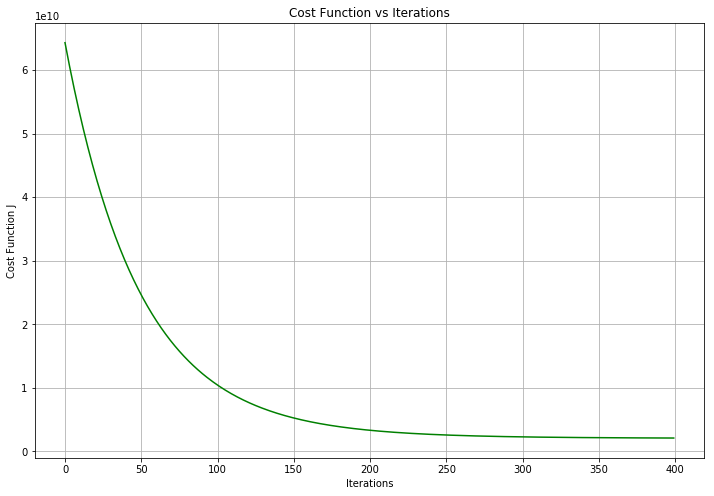

In [19]:
plt.figure(figsize=(12,8))
plt.plot(J_hist, 'g-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function J')
plt.title('Cost Function vs Iterations')
plt.grid(True)

#### Results from Gradient Descent

In [20]:
print('Theta computed from gradient descent: {}'.format(theta_grad))

Theta computed from gradient descent: [334302.06399328  99411.44947359   3267.01285407]


##### Predict Prices based on features

In [21]:
# Set features to predict and normalize them
predict1 = [1650 , 3]
predict1_norm = (predict1 - X_mu) / X_sigma
predict1_norm = np.insert(predict1_norm, 0, 1, axis=0) # add the 1s column for feature x0

In [22]:
price1_grad = np.dot(predict1_norm, theta_grad)

In [23]:
print('The price of a 1650 ft^2 house with 3 bedrooms predicted using gradient descent: ${}'.format(np.round(price1_grad,2)))

The price of a 1650 ft^2 house with 3 bedrooms predicted using gradient descent: $289221.55


### 3.3 Normal Equation
Calculate theta using the normal equation

Compare to theta found using gradient descent and compare how the house predicted price using both methods

In [24]:
def normal_equation(X, y):
    '''
        Returns theta values calculated using the normal equation
        Note: there is no need to normalize data here
    '''
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

In [25]:
predict1 = [1, 1650, 3]
theta_normal_equation = normal_equation(X,y)
price1_normal_equation = np.dot(predict1, theta_normal_equation) # h is theta_transpose * X or X*theta

In [26]:
print('Theta calculated using the normal equation: {}'.format(theta_normal_equation))

Theta calculated using the normal equation: [89597.90954361   139.21067402 -8738.01911255]


In [27]:
print('The price of a 1650 ft^2 house with 3 bedrooms predicted using the normal equation: ${}'.format(np.round(price1_normal_equation,2)))

The price of a 1650 ft^2 house with 3 bedrooms predicted using the normal equation: $293081.46
